# **End-to-end Churn Prediction Project**

## **1) Introduction**

#### **Life cycle of the project**

- Understanding the Problem Statement
- Data Collection
- SEMMA: Sample, Explore, Modify, Model, Assess

#### **Problem Statement**

In the modern banking landscape, customer retention plays a critical role in maintaining long-term profitability. Acquiring new customers is significantly more expensive than retaining existing ones, so understanding the factors that lead to customer attrition is essential.
This project focuses on predicting customer churn for a bank’s credit card services.

#### **Objective**

The main goal of this study is to:

- Predict which customers are likely to churn (i.e., stop using the credit card service).
- Identify the key factors influencing churn decisions.
- Provide actionable business recommendations based on predictive insights.

#### **Data Understanding**

The dataset used in this project comes from Kaggle:
[Credit Card Customers Dataset](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers)

It contains 10,127 observations and 21 variables, describing customers’ demographic information, relationship with the bank, and activity patterns.

Each record corresponds to one customer, and the target variable is Attrition_Flag, which indicates whether the customer has churned.

#### **Data Fields Overview**

| Feature                    | Description                                                             |
| -------------------------- | ----------------------------------------------------------------------- |
| `CLIENTNUM`                | Unique customer identifier                                              |
| `Attrition_Flag`           | Customer status: *Existing Customer* or *Attrited Customer*             |
| `Customer_Age`             | Age of the customer                                                     |
| `Gender`                   | Gender of the customer (M/F)                                            |
| `Dependent_count`          | Number of dependents of the customer                                    |
| `Education_Level`          | Highest level of education attained                                     |
| `Marital_Status`           | Marital status (Married, Single, Divorced, etc.)                        |
| `Income_Category`          | Annual income range                                                     |
| `Card_Category`            | Type of credit card (Blue, Silver, Gold, Platinum)                      |
| `Months_on_book`           | Period of relationship with the bank (in months)                        |
| `Total_Relationship_Count` | Total number of products held by the customer                           |
| `Months_Inactive_12_mon`   | Number of inactive months in the last 12 months                         |
| `Contacts_Count_12_mon`    | Number of contacts with the bank in the last 12 months                  |
| `Credit_Limit`             | Credit limit on the credit card                                         |
| `Total_Revolving_Bal`      | Total revolving balance on the credit card                              |
| `Avg_Open_To_Buy`          | Average open-to-buy credit line                                         |
| `Total_Amt_Chng_Q4_Q1`     | Ratio of total transaction amount (Q4/Q1)                               |
| `Total_Trans_Amt`          | Total transaction amount in the last 12 months                          |
| `Total_Trans_Ct`           | Total transaction count in the last 12 months                           |
| `Total_Ct_Chng_Q4_Q1`      | Ratio of total transaction count (Q4/Q1)                                |
| `Avg_Utilization_Ratio`    | Average card utilization ratio                                          |

## **2) Data Collection and Import Required Packages**

In [11]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn import tree
from statsmodels.stats.outliers_influence import variance_inflation_factor


**Import Data from MySQL as DataFrame**

In [12]:

with pymysql.connect(
    host="localhost",
    user="pedro",
    password="12345",
    database="bank_db",
    charset='utf8mb4',
    cursorclass=pymysql.cursors.DictCursor
) as conn:
    cursor = conn.cursor()
    cursor.execute('SELECT * FROM churners;')
    data = cursor.fetchall()
    

In [13]:
df = pd.DataFrame(data)

**Show Top 5 Records**

In [14]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0         12691                  777            11914                 1.335   
1          8256                  864             7392                 1.541   
2          3418                    0             3418                 2.594   
3          3313                 2517              796                 1.405   
4          4716                    0             4716                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

**Shape of the dataset**

In [15]:
df.shape

(10127, 21)

**Summary of the dataset**

In [16]:
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.938679          1162.814061   
std                 1.106225   9088.788539           814.987335   
min                 0.000000   1438.000000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.124617              0.759941      4404.086304       64.858695   
std        9090.695763              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

**Check null and datatypes in the dataset**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  int64  
 14  Total_

**Target distribution in the dataset**

In [18]:
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

**Replacing target values and column name**

In [19]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Attrited Customer': 1,
                                                 'Existing Customer': 0})
df['Churn'] = df['Attrition_Flag']
df.drop(columns='Attrition_Flag', inplace=True) 

## **3) Sample**

In [20]:
features = df.columns[1:-1] # Without 'CLIENTNUM' column
target = 'Churn'
X, y = df[features], df[target] 

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                    test_size=0.2, 
                                                                    stratify=y,
                                                                    random_state=42)

In [21]:
print("Target proportion train:", y_train.mean())
print("Target proportion test:", y_test.mean())

Target proportion train: 0.1607208986544871
Target proportion test: 0.16041461006910168


## **4) Explore**

In [22]:
churn_counts = y_train.value_counts()
print('Churn distribution in the train set \n', churn_counts,'\n')

churn_rates = y_train.value_counts()/len(y_train)*100
print('Churn rate in the train set \n', churn_rates)


Churn distribution in the train set 
 Churn
0    6799
1    1302
Name: count, dtype: int64 

Churn rate in the train set 
 Churn
0    83.92791
1    16.07209
Name: count, dtype: float64


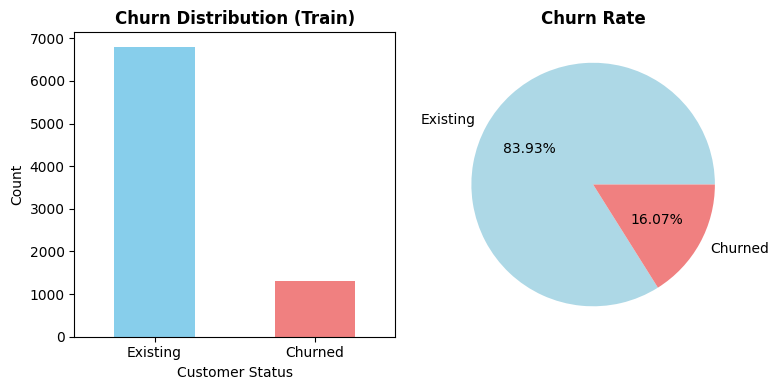

In [23]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
churn_counts.plot(kind='bar', color=['skyblue','lightcoral'])
plt.title('Churn Distribution (Train)', fontweight='bold')
plt.xlabel('Customer Status')
plt.ylabel('Count') 
plt.xticks(ticks=[0, 1], labels=['Existing', 'Churned'], rotation=0)

plt.subplot(1,2,2)
plt.pie(churn_counts, 
        labels=['Existing','Churned'], 
        autopct="%1.2f%%", 
        colors=['lightblue', 'lightcoral'])
plt.title('Churn Rate', fontweight='bold')

plt.tight_layout()
plt.show()


**Define DataFrame with train data to explore**

In [24]:
df_explore = X_train.copy()
df_explore[target] = y_train
df_explore.head()

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
2856            36      F                0         Unknown        Married   
6515            44      M                3     High School         Single   
7141            46      M                2     High School        Married   
632             36      F                2        Graduate        Married   
3496            50      M                1        Graduate         Single   

     Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
2856  Less than $40K          Blue              24                         4   
6515     $60K - $80K        Silver              36                         5   
7141    $80K - $120K          Blue              30                         6   
632   Less than $40K          Blue              24                         3   
3496         $120K +          Blue              40                         4   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
2856                       3                      2          2570   
6515                       2                      3         25276   
7141                       3                      1         11670   
632                        1                      3          3124   
3496                       2                      3         34516   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
2856                 2230              340                 0.686   
6515                    0            25276                 0.849   
7141                  915            10755                 0.892   
632                  1593             1531                 0.869   
3496                 1185            33331                 0.725   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
2856             1755              42                0.448   
6515             2282              38                0.583   
7141             4277              89                0.854   
632              1652              41                0.367   
3496             3874              72                0.714   

      Avg_Utilization_Ratio  Churn  
2856                  0.868      0  
6515                  0.000      1  
7141                  0.078      0  
632                   0.510      0  
3496                  0.034      0

#### **4.1 Explore - Categorical Columns**

**Bar plots**

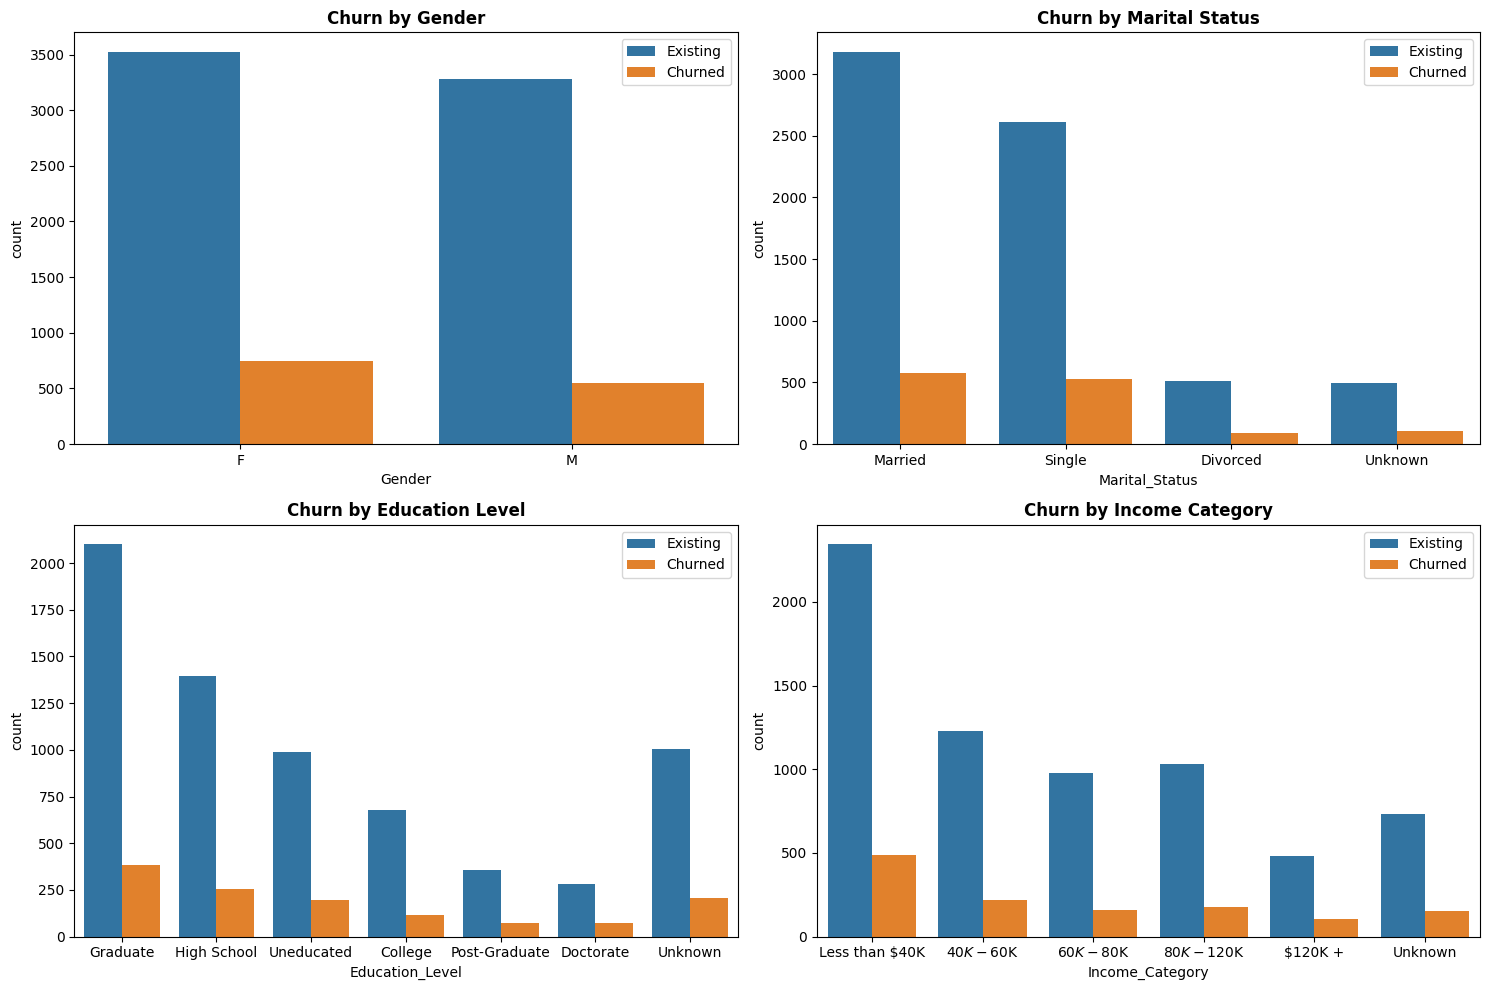

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gender
sns.countplot(data=df_explore, x='Gender', hue='Churn', ax=axes[0,0])
axes[0,0].set_title('Churn by Gender', fontweight='bold')
axes[0,0].legend(['Existing', 'Churned'])

# Marital status
sns.countplot(data=df_explore, x='Marital_Status', hue='Churn', ax=axes[0,1])
axes[0,1].set_title('Churn by Marital Status', fontweight='bold')
axes[0,1].legend(['Existing', 'Churned'])

# Education level
education_order = ['Graduate', 'High School', 'Uneducated', 'College', 'Post-Graduate', 'Doctorate', 'Unknown']
sns.countplot(data=df_explore, x='Education_Level', hue='Churn', ax=axes[1,0], order=education_order)
axes[1,0].set_title('Churn by Education Level', fontweight='bold')
axes[1,0].legend(['Existing', 'Churned'])

# Income category
income_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']
sns.countplot(data=df_explore, x='Income_Category', hue='Churn', ax=axes[1,1], order=income_order)
axes[1,1].set_title('Churn by Income Category', fontweight='bold')
axes[1,1].legend(['Existing', 'Churned'])

plt.tight_layout()
plt.show()

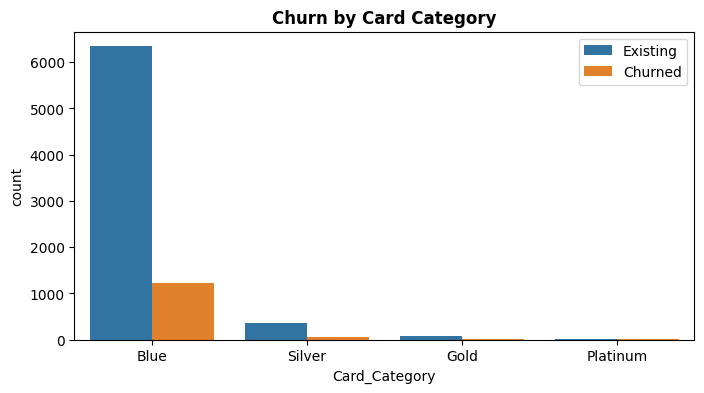

In [26]:
plt.figure(figsize=(8,4))

# Card category
sns.countplot(data=df_explore, x='Card_Category', hue='Churn')
plt.title('Churn by Card Category', fontweight='bold')
plt.legend(['Existing', 'Churned'])

plt.show()

**Compare churn rates between categories and groups**

In [27]:
categorical_cols = df_explore.select_dtypes(include='object').columns.to_list() # Define categorical columns

for col in categorical_cols:
    summary_cat = df_explore.groupby(by=col)[target].mean().sort_values(ascending=False)
    print(summary_cat,'\n')

Gender
F    0.175328
M    0.144424
Name: Churn, dtype: float64 

Education_Level
Doctorate        0.205056
Unknown          0.169843
Post-Graduate    0.168618
Uneducated       0.165680
High School      0.155152
Graduate         0.153908
College          0.148241
Name: Churn, dtype: float64 

Marital_Status
Unknown     0.178512
Single      0.169001
Married     0.153395
Divorced    0.145242
Name: Churn, dtype: float64 

Income_Category
$120K +           0.178571
Unknown           0.172686
Less than $40K    0.172316
$40K - $60K       0.151724
$80K - $120K      0.148056
$60K - $80K       0.138204
Name: Churn, dtype: float64 

Card_Category
Platinum    0.235294
Gold        0.191489
Blue        0.161132
Silver      0.143852
Name: Churn, dtype: float64 



**Insights**

- Both male and female customers show similar churn rates, but female customers exhibit a slightly higher rate.
- Most customers are graduates or high school educated. Customers with a Doctorate degree show the highest churn rate.
- Churn is highest among both the lowest and highest income brackets, forming a U-shaped relationship.
- The vast majority of customers own a Blue card, which also shows the highest churn count due to its large population.
- Churn rates are similar across the majority of groups, so we need more analysis to drive conclusion. 


#### **4.2 Explore - Numeric Columns**

In [28]:
numeric_cols = df_explore.select_dtypes(include=np.number).columns.to_list() # Define numeric columns


**Histograms**

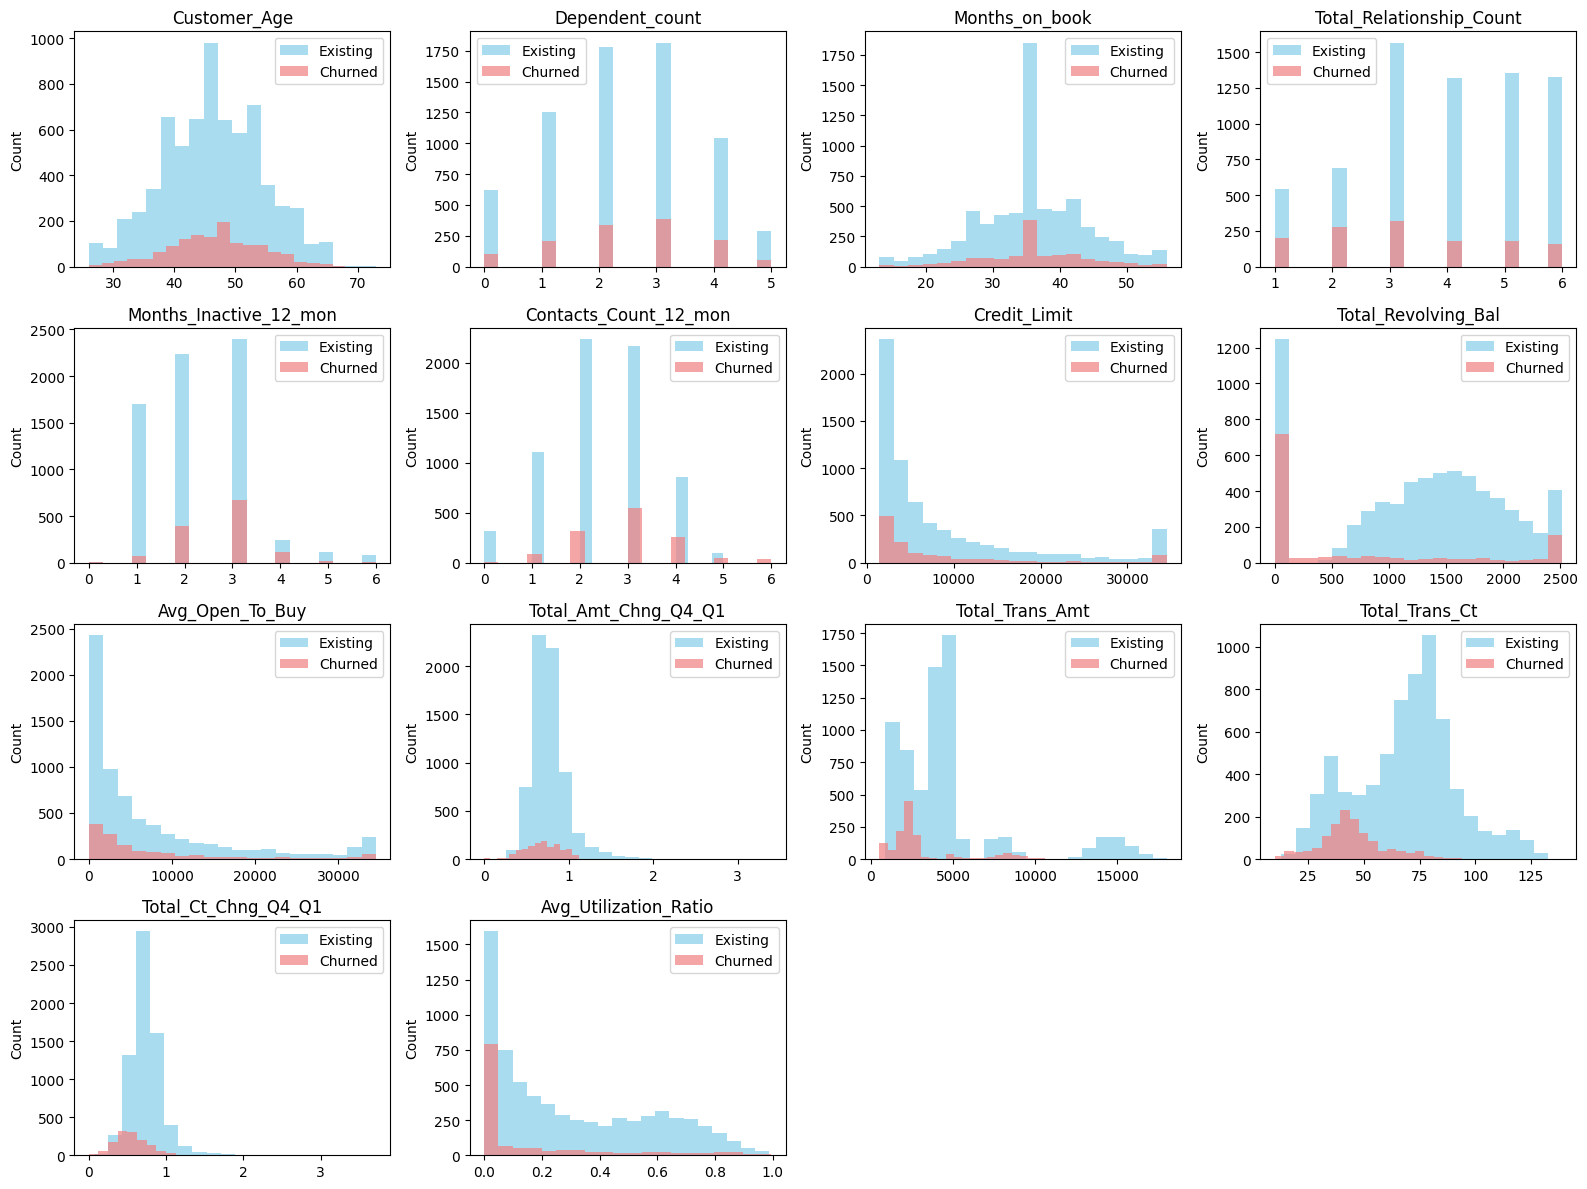

In [29]:
existing = df_explore[df_explore['Churn'] == 0]
churned = df_explore[df_explore['Churn'] == 1]

fig, axes = plt.subplots(4, 4, figsize=(16, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_cols[:-1]):
    axes[i].hist(existing[col], alpha=0.7, label='Existing', bins=20, color='skyblue')
    axes[i].hist(churned[col], alpha=0.7, label='Churned', bins=20, color='lightcoral')
    axes[i].set_title(col)
    axes[i].set_ylabel('Count')
    axes[i].legend()

# Hide empty subplots
for i in range(len(numeric_cols[:-1]), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

**Insights**

- Transactional activity (e.g., total transaction count and amount) tends to be lower among churned customers, suggesting disengagement before leaving.

- Credit-related variables (e.g., credit limit, revolving balance, utilization ratio) show strong right-skewed distributions, typical for financial data.


**Boxplots**

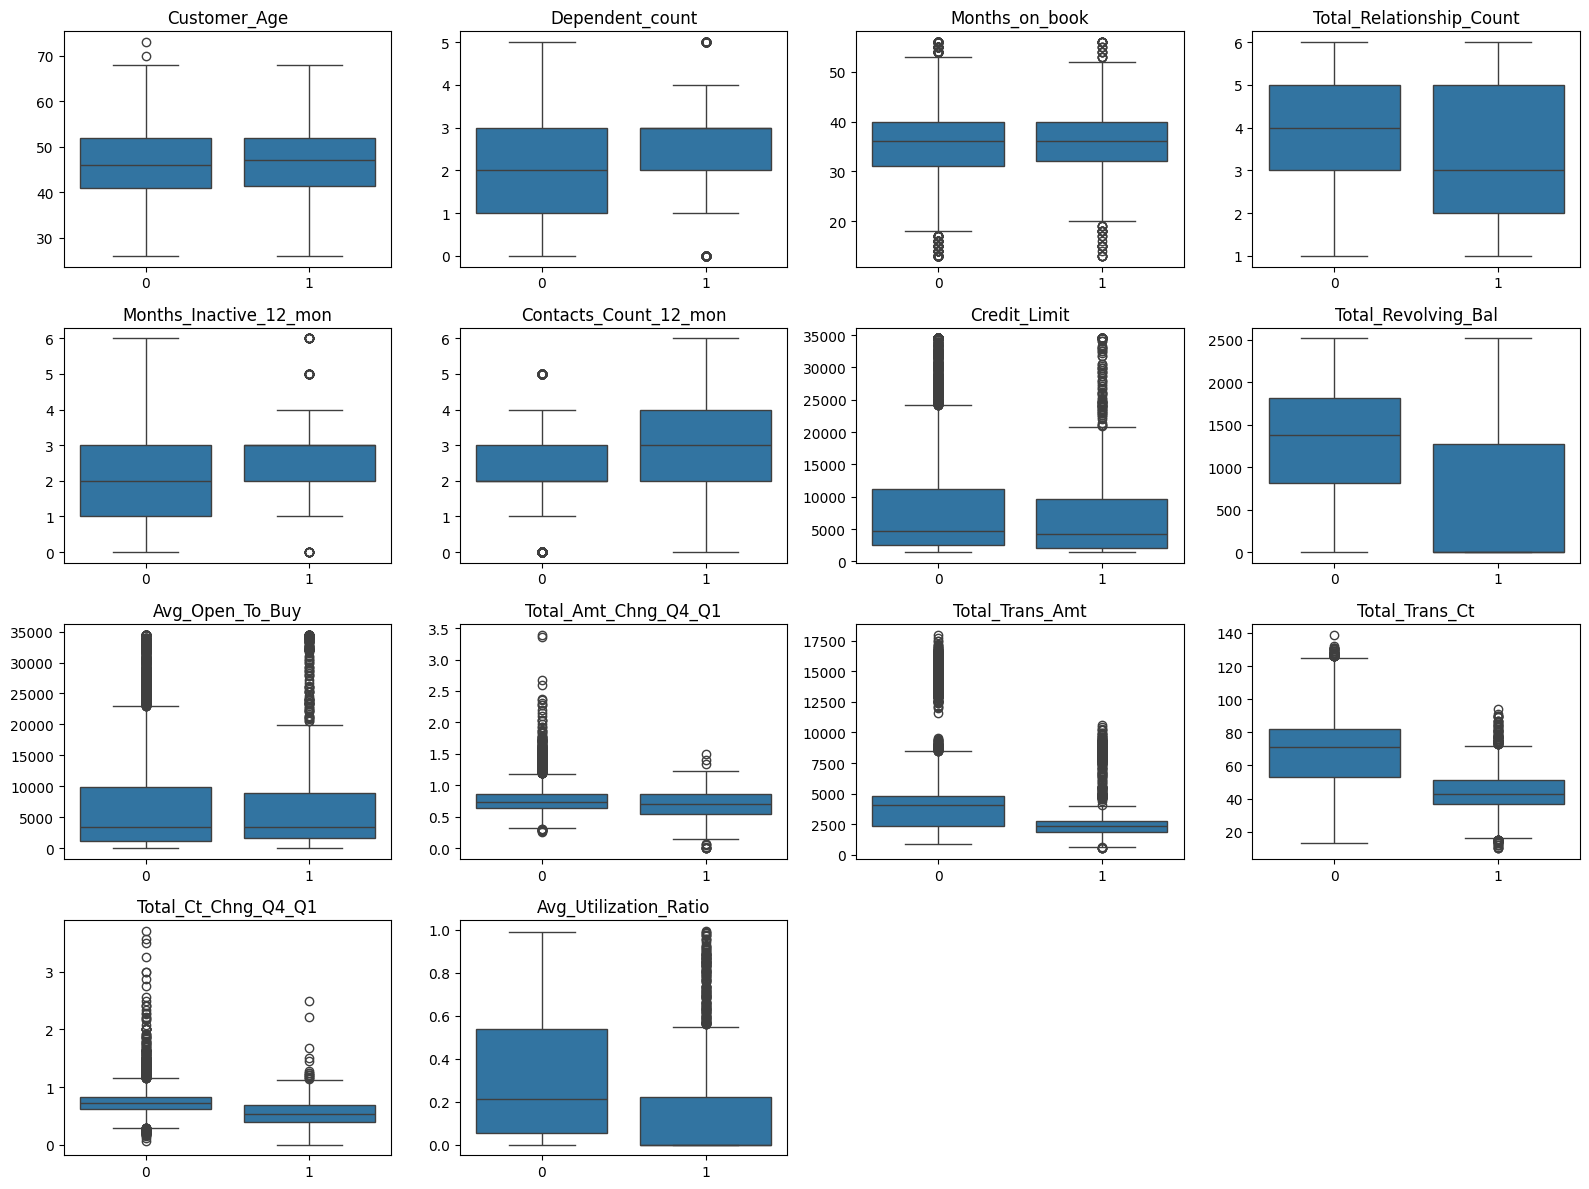

In [30]:
fig, axes = plt.subplots(4, 4, figsize=(16, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_cols[:-1]):
    sns.boxplot(data=df_explore, x='Churn', y=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')


# Hide empty subplots
for i in range(len(numeric_cols[:-1]), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

**Correlation matrix**

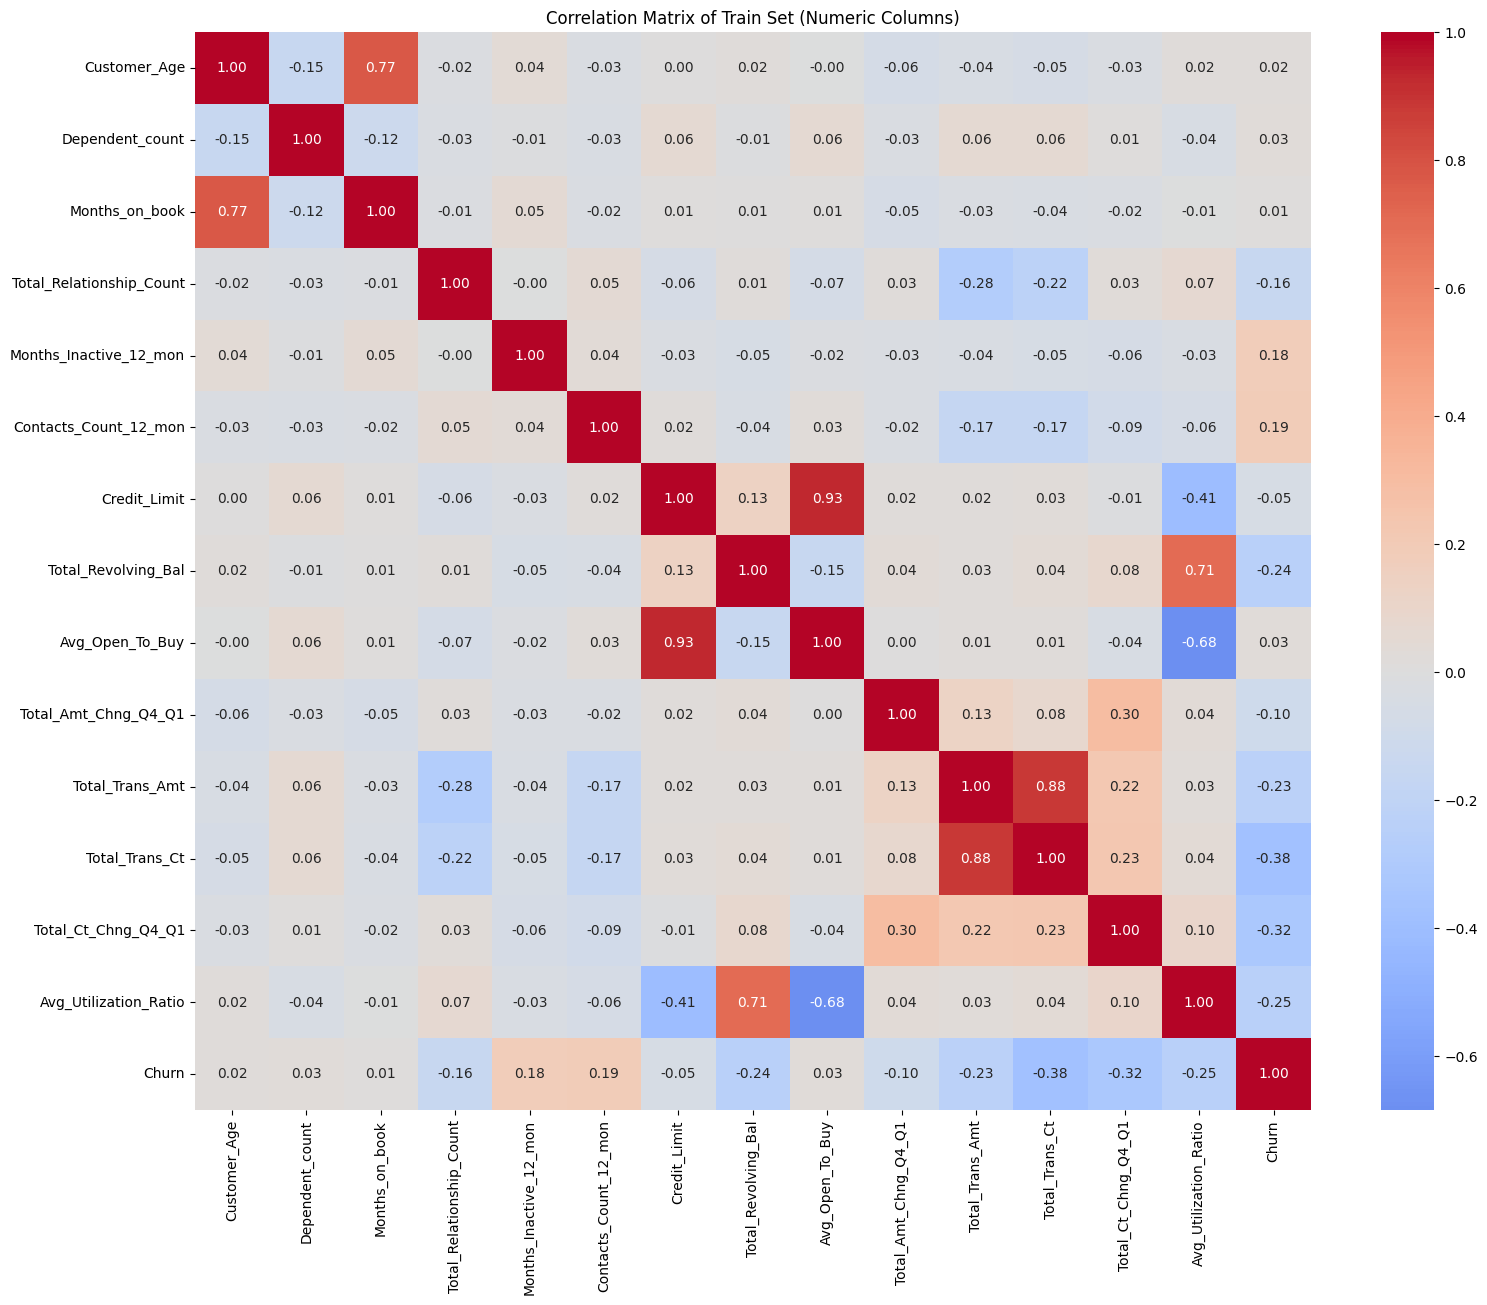

Top correlations with churn:
Churn                       1.000000
Contacts_Count_12_mon       0.190612
Months_Inactive_12_mon      0.180698
Dependent_count             0.032325
Avg_Open_To_Buy             0.031754
Customer_Age                0.015798
Months_on_book              0.009995
Credit_Limit               -0.051489
Total_Amt_Chng_Q4_Q1       -0.102210
Total_Relationship_Count   -0.156026
Total_Trans_Amt            -0.228172
Total_Revolving_Bal        -0.244085
Avg_Utilization_Ratio      -0.248685
Total_Ct_Chng_Q4_Q1        -0.315601
Total_Trans_Ct             -0.377168
Name: Churn, dtype: float64


In [31]:
corr = df_explore[numeric_cols].corr(method='spearman')

plt.figure(figsize=(18, 14))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("Correlation Matrix of Train Set (Numeric Columns)")
plt.show()

# Top correlations with churn
churn_correlations = corr['Churn'].sort_values(ascending=False)
print("Top correlations with churn:")
print(churn_correlations)

**Insights**
- Total Transaction Count and Total Transaction Amount show a strong positive correlation (0.88).

- Churn has the strongest negative correlations with: Total_Trans_Ct, Total_Trans_Amt, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio. These suggest that higher engagement and utilization reduce churn probability.

**Pairplot analysis with some selected features**

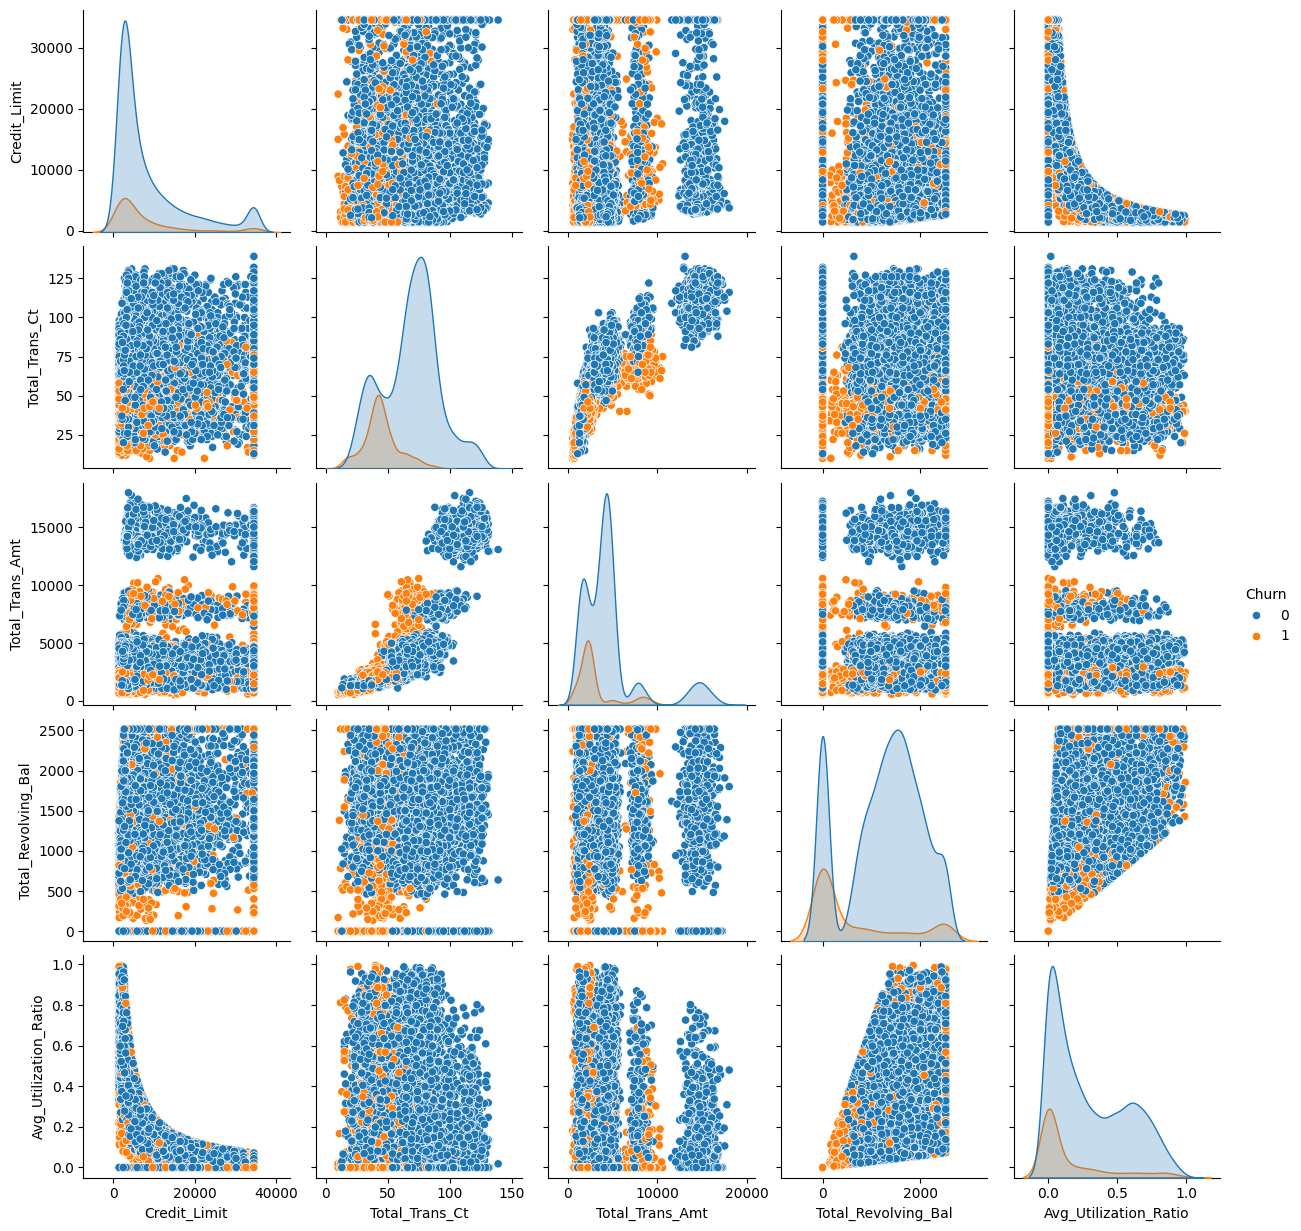

In [32]:
selected_pairplot = ['Credit_Limit','Total_Trans_Ct', 'Total_Trans_Amt', 
            'Total_Revolving_Bal', 'Avg_Utilization_Ratio','Churn']
sns.pairplot(df_explore[selected_pairplot], hue='Churn')
plt.show()

**Insights**

- Credit Limit vs. Utilization: Customers with higher credit limits use a smaller fraction of their available credit.

- Credit Limit vs Revolving Balance: Churners appear to maintain lower balances and utilization.

- Total_Trans_Ct vs Total_Trans_Amt: Linear correlation. Customers that make more transactions also spend more overall.

- Total_Revolving_Bal vs Avg_Utilization_Ratio:	Positive relationship. Higher balance suggests higher utilization.

- Churn distribution: Churned customers are less represented in the higher activity regions of the plots (fewer transactions, lower spending, and lower utilization), suggesting that *engagement intensity is a key differentiator*. 

**Compare existing (0) and churned (1) groups in numeric columns**

In [33]:
summary_num = df_explore[numeric_cols].groupby(by=target).mean().T
summary_num['ratio'] = summary_num[0]/summary_num[1]

summary_num.sort_values(by='ratio', ascending=False)

Churn                               0            1     ratio
Avg_Utilization_Ratio        0.298408     0.156920  1.901658
Total_Revolving_Bal       1263.072217   669.496160  1.886601
Total_Trans_Ct              68.550081    44.606759  1.536764
Total_Trans_Amt           4645.956317  3041.365591  1.527589
Total_Ct_Chng_Q4_Q1          0.743790     0.554513  1.341338
Total_Relationship_Count     3.916900     3.251920  1.204488
Total_Amt_Chng_Q4_Q1         0.772013     0.694873  1.111013
Credit_Limit              8674.819385  8085.201997  1.072925
Avg_Open_To_Buy           7411.747169  7415.705837  0.999466
Months_on_book              35.977350    36.152842  0.995146
Customer_Age                46.329901    46.705069  0.991967
Dependent_count              2.331519     2.440860  0.955204
Months_Inactive_12_mon       2.276364     2.711214  0.839611
Contacts_Count_12_mon        2.356670     2.977727  0.791433

**Insights**
- Customer engagement metrics and financial involvement are the strongest indicators of churn.

- Demographics (age, dependents) and tenure have weak associations with churn.

## **5) Modify**

#### **5.1 Feature Selection**

**Perform Decision Tree classification to uncover importances**

In [34]:
# Preprocessing: one-hot for categorical, passthrough for numeric
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols[:-1])
    ]
)

tree_explore = tree.DecisionTreeClassifier(random_state=42, max_depth=5)

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', tree_explore)])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Gender', 'Education_Level',
                                                   'Marital_Status',
                                                   'Income_Category',
                                                   'Card_Category']),
                                                 ('num', 'passthrough',
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [35]:
# Get the encoded feature names
cat_features = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)
all_features = np.concatenate([cat_features, numeric_cols[:-1]])

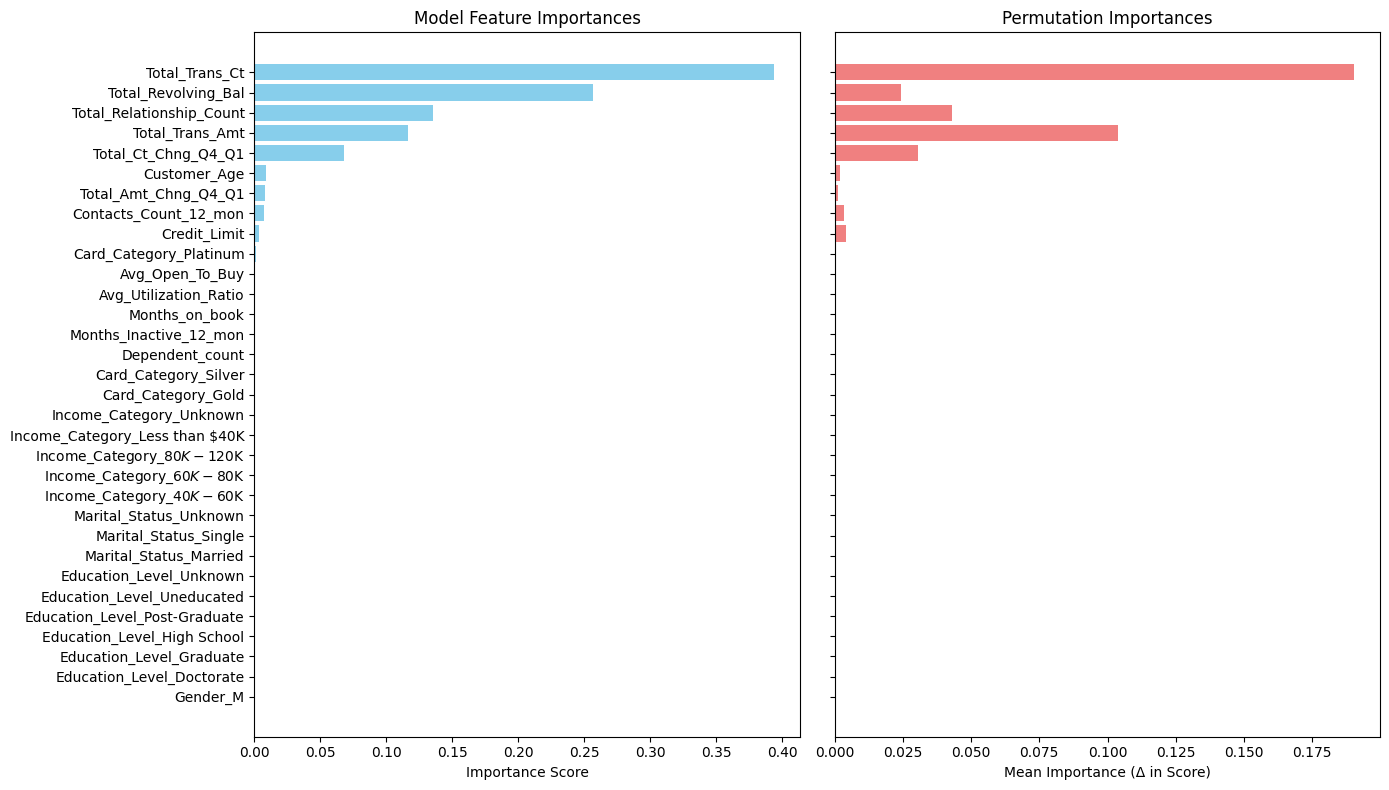

In [36]:
# Feature importances from the model
importances = model.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]
sorted_features = np.array(all_features)[indices]
sorted_importances = importances[indices]

# Permutation importances
r = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)
perm_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': r.importances_mean
}).sort_values(by='importance', ascending=False)


# Align both by feature names
# Optional step: reindex permutation importance to match model order (for consistent comparison)
perm_aligned = perm_importance.set_index('feature').reindex(sorted_features).fillna(0)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 8), sharey=True)

# Tree-based importances
axes[0].barh(sorted_features, sorted_importances, color='skyblue')
axes[0].set_title("Model Feature Importances")
axes[0].set_xlabel("Importance Score")

# Permutation importances
axes[1].barh(perm_aligned.index, perm_aligned['importance'], color='lightcoral')
axes[1].invert_yaxis() # Descending order
axes[1].set_title("Permutation Importances")
axes[1].set_xlabel("Mean Importance (Δ in Score)")

plt.tight_layout()
plt.show()

**Select features with more than 0.01 of permutation importance**

In [37]:
selected_features = perm_importance[perm_importance['importance'] > 0.01]['feature'].to_list()
selected_features

['Total_Trans_Ct',
 'Total_Trans_Amt',
 'Total_Relationship_Count',
 'Total_Ct_Chng_Q4_Q1',
 'Total_Revolving_Bal']

**Perform VIF for final selection**

In [38]:
# Only numeric features
X_num = X_train[selected_features]

vif_data = pd.DataFrame()
vif_data["feature"] = X_num.columns
vif_data["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]
vif_data.sort_values(by="VIF", ascending=False)


feature        VIF
0            Total_Trans_Ct  18.705121
1           Total_Trans_Amt   8.020324
3       Total_Ct_Chng_Q4_Q1   7.740580
2  Total_Relationship_Count   5.861925
4       Total_Revolving_Bal   2.977154

Although Total_Trans_Ct shows a VIF above 10, suggesting strong multicollinearity with Total_Trans_Amt, both variables provide complementary information about customer transaction behavior. Instead of removing one, they were combined into a new feature, Average_Transaction_Value (Total_Trans_Amt / Total_Trans_Ct), to capture spending patterns more effectively while mitigating redundancy and maintaining interpretability.

**Feature Transformation**

In [39]:
X_train['Average_Transaction_Value'] = X_train['Total_Trans_Amt'] / X_train['Total_Trans_Ct']
selected_features.remove('Total_Trans_Amt')
selected_features.remove('Total_Trans_Ct')
selected_features.append('Average_Transaction_Value')

In [40]:
X_num = X_train[selected_features]

vif_data = pd.DataFrame()
vif_data["feature"] = X_num.columns
vif_data["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]
vif_data.sort_values(by="VIF", ascending=False)

feature       VIF
1        Total_Ct_Chng_Q4_Q1  7.609459
3  Average_Transaction_Value  4.775425
0   Total_Relationship_Count  4.748395
2        Total_Revolving_Bal  2.962749

VIF values ​​less than 10 are tolerable

#### **5.2 Class Imbalance Handling**

The dataset exhibited a strong class imbalance, with only 16% of customers labeled as "Churn".
To mitigate model bias toward the majority class, I applied SMOTETomek, which combines SMOTE (Synthetic Minority Oversampling Technique) with Tomek Links undersampling, generating synthetic minority samples while simultaneously removing ambiguous examples near the class boundary. This approach enhances class balance and helps the model learn cleaner, more distinct decision boundaries.


In [ ]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_train_res, y_train_res = smote_tomek.fit_resample(X_train[selected_features], y_train)
# Since we're using selected_features (only numeric), 
# there is no problems with categorical values

In [ ]:
churn_counts = y_train_res.value_counts()
print('Churn distribution in the resampled train set \n', churn_counts,'\n')

churn_rates = y_train_res.value_counts()/len(y_train_res)*100
print('Churn rate in the resampled train set \n', churn_rates)